# 전체 운전자 및 10대 운전자 면허종별 교통사고

In [1]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [3]:
plt.rc("font", family="Malgun Gothic")

In [4]:
driver_license_type_5_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.driver_license_type_5`
    WHERE
        accident_type = 'accident' AND age_group IN ('all_age', '10', '65')
"""

In [5]:
driver_license_type_5_df = client.query(driver_license_type_5_sql).to_dataframe()
driver_license_type_5_df = driver_license_type_5_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
driver_license_type_5_df = driver_license_type_5_df.drop(columns=["accident_type", "total"])

In [7]:
driver_license_type_5_df

,제1종,제2종,연습면허,무면허,국제면허,기타
age_group,,,,,,
all_age,142449.6,54029.0,88.6,5075.8,107.0,9523.6
10,1435.4,3167.6,20.4,1063.0,3.4,1200.6
65,21301.0,8375.0,8.0,689.6,7.2,1782.4


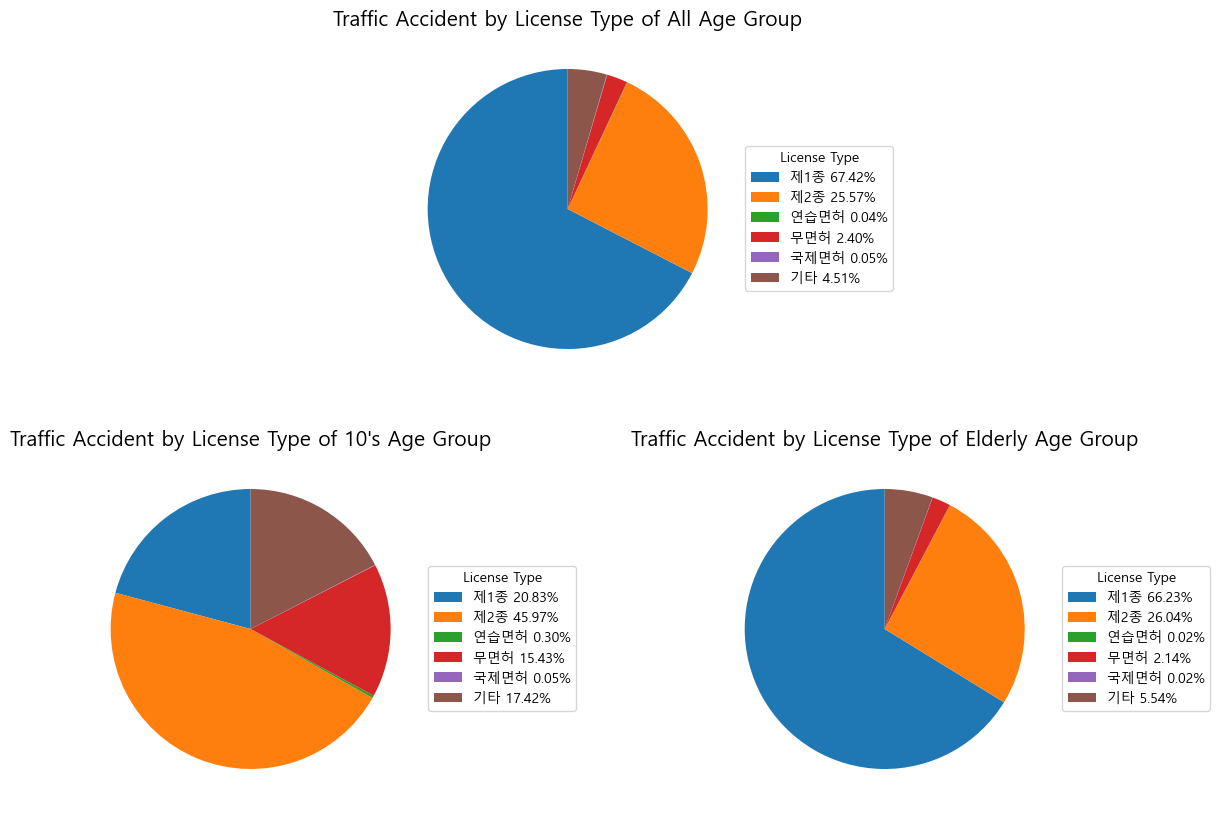

In [8]:
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3]
titles = [
    "Traffic Accident by License Type of All Age Group",
    "Traffic Accident by License Type of 10's Age Group",
    "Traffic Accident by License Type of Elderly Age Group"
]
for i, (index, row) in enumerate(driver_license_type_5_df.iterrows()):
    values = row.values
    labels = row.index
    wedges, texts = axes[i].pie(values, startangle=90)
    legend_labels = [f"{label} {value:.2f}%" for label, value in zip(labels, 100 * values / values.sum())]
    axes[i].set_title(titles[i], size=15)
    legend = axes[i].legend(wedges, legend_labels, title="License Type", loc="best", bbox_to_anchor=(1, 0, 0.45, 0.7))
    plt.savefig("driver_license_type.png", bbox_inches="tight")